In [1]:
# import the neccessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import the csv file

df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [113]:
df.describe()

Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75%       2.477420     1.666678     1.000000  
max       3.000000     3.000000     2.000000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

## Dataset has no missing values so I will split the features to numerical and categorical features

In [6]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [7]:
# Grouping the features into categorical and numerical features

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

# I'll view each unique value in the categorical features

In [8]:
for col in cat_cols:
    print(f"{col}: {df[col].nunique()}, {df[col].unique()}")

Gender: 2, ['Female' 'Male']
family_history_with_overweight: 2, ['yes' 'no']
FAVC: 2, ['no' 'yes']
CAEC: 4, ['Sometimes' 'Frequently' 'Always' 'no']
SMOKE: 2, ['no' 'yes']
SCC: 2, ['no' 'yes']
CALC: 4, ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS: 5, ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad: 7, ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


# Duplicate the dataset in order not to change the orginal values

In [9]:
enc_df = df.copy()

# Applying label encoder class to categorical features like 
# 'Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC' & 'NObeyesdad'

In [69]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le_value = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'NObeyesdad']
for col in enc_df[le_value].columns:
    enc_df[col] = le.fit_transform(enc_df[col])

In [10]:
enc_df

Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0      no   2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.000000   
1      no   3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.000000   
2      no   2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.000000   
3      no   3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.000000   
4      no   2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.000000   
...   ...   ...  ...        ...   ...       ...  ...       ...       ...   
2106  yes   3.0  3.0  Sometimes    no  1.728139   no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130   no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193   no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339   no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513   no  1.026452  0.714137   

            CALC                 MTRANS           NObeyesdad  
0             no  Public_Transportation        Normal_Weight  
1      Sometimes  Public_Transportation        Normal_Weight  
2     Frequently  Public_Transportation        Normal_Weight  
3     Frequently                Walking   Overweight_Level_I  
4      Sometimes  Public_Transportation  Overweight_Level_II  
...          ...                    ...                  ...  
2106   Sometimes  Public_Transportation     Obesity_Type_III  
2107   Sometimes  Public_Transportation     Obesity_Type_III  
2108   Sometimes  Public_Transportation     Obesity_Type_III  
2109   Sometimes  Public_Transportation     Obesity_Type_III  
2110   Sometimes  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]

# Applying one hot encoding class to categorical features like
# 'CAEC', 'CALC', 'MTRANS'

In [70]:
from sklearn.preprocessing import OneHotEncoder

#Initialize OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
ohe_value = ['CAEC', 'CALC', 'MTRANS']

# Apply one-hot encoding to the categorical columns
ohenc = ohe.fit_transform(enc_df[ohe_value])

#Create a DataFrame with the one-hot encoded columns
#I use get_feature_names_out() to get the column names for the encoded data
ohe_df = pd.DataFrame(ohenc, columns=ohe.get_feature_names_out(ohe_value))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_enc = pd.concat([enc_df, ohe_df], axis=1)

# Drop the original categorical columns
df_enc = df_enc.drop(ohe_value, axis=1)

In [71]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SMOKE                           2111 non-null   int64  
 9   CH2O                            2111 non-null   float64
 10  SCC                             2111 non-null   int64  
 11  FAF                             2111 non-null   float64
 12  TUE                             21

# The next step of phase 1 is to use boxplot to detect any outliers in the numerical features

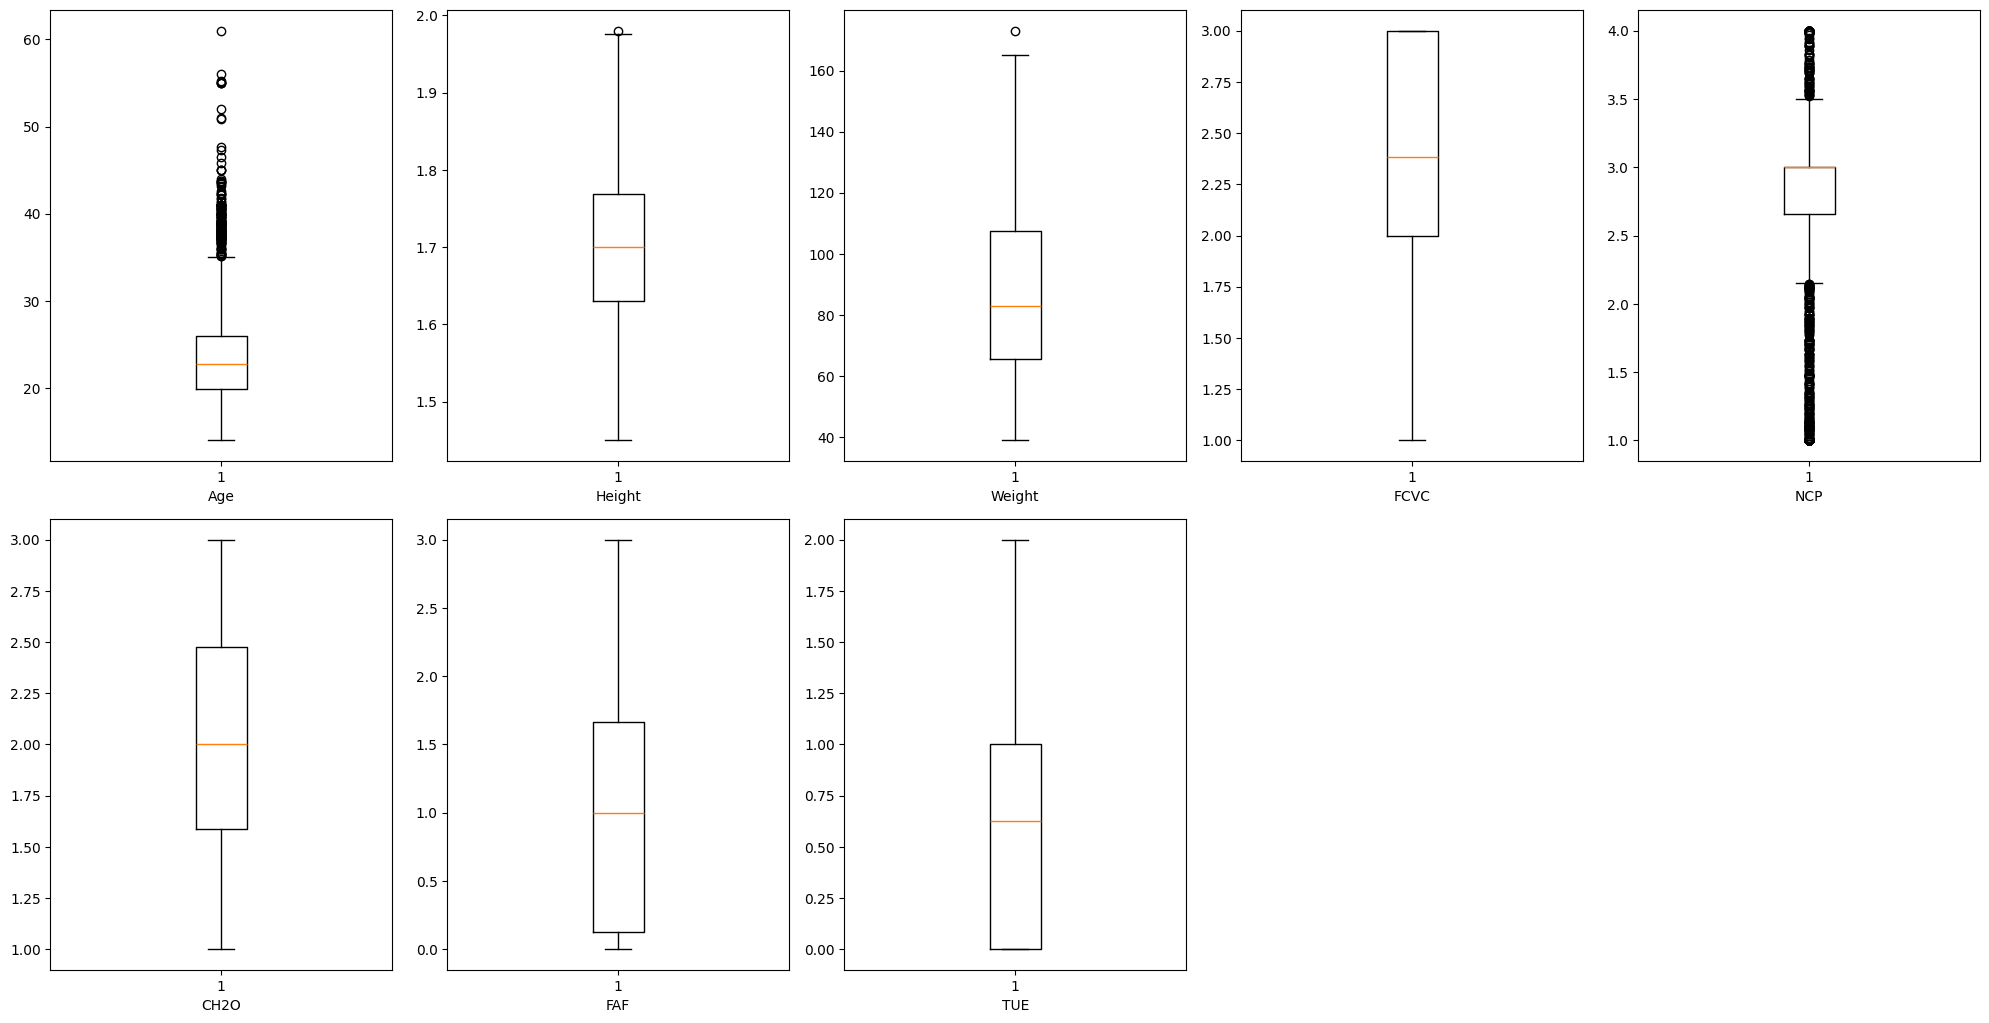

In [12]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= len(num_cols):
        ax = plt.subplot(3, 5, plotnumber)
        plt.boxplot(df_enc[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

# From the displot graph above, it can be seen that the Height and Weight columns have mild outliers, while the rest has no outlier.

# Using interquartile range to cap the Height and Weight column

In [13]:
def iqr(data):
    q1 = df_enc[data].quantile(0.25)
    q3 = df_enc[data].quantile(0.75)

    interRange = q3 - q1

    lower_bound = q1 - 1.5 * interRange
    upper_bound = q3 + 1.5 * interRange

    return df_enc[data][(df_enc[data] >= lower_bound) & (df_enc[data] <= upper_bound)]

In [14]:
df_enc['Height'] = iqr('Height')

In [15]:
df_enc['Weight'] = iqr('Weight')

In [18]:
df_enc.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP SMOKE  CH2O  ... CAEC_no  CALC_Always  CALC_Frequently CALC_Sometimes  \
0  3.0    no   2.0  ...     0.0          0.0              0.0            0.0   
1  3.0   yes   3.0  ...     0.0          0.0              0.0            1.0   
2  3.0    no   2.0  ...     0.0          0.0              1.0            0.0   
3  3.0    no   2.0  ...     0.0          0.0              1.0            0.0   
4  1.0    no   2.0  ...     0.0          0.0              0.0            1.0   

   CALC_no  MTRANS_Automobile  MTRANS_Bike  MTRANS_Motorbike  \
0      1.0                0.0          0.0               0.0   
1      0.0                0.0          0.0               0.0   
2      0.0                0.0          0.0               0.0   
3      0.0                0.0          0.0               0.0   
4      0.0                0.0          0.0               0.0   

   MTRANS_Public_Transportation  MTRANS_Walking  
0                           1.0             0.0  
1                           1.0             0.0  
2                           1.0             0.0  
3                           0.0             1.0  
4                           1.0             0.0  

[5 rows x 27 columns]

In [20]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
normalized_data = scaler.fit_transform(df_enc[["Age", "Height", "Weight"]])
df_enc[["Age", "Height", "Weight"]] = normalized_data

In [23]:
df_enc

Gender       Age    Height    Weight  family_history_with_overweight  \
0          0  0.148936  0.323401  0.198323                               1   
1          0  0.148936  0.133165  0.134859                               1   
2          1  0.191489  0.665826  0.301450                               1   
3          1  0.276596  0.665826  0.380779                               0   
4          1  0.170213  0.627779  0.402991                               0   
...      ...       ...       ...       ...                             ...   
2106       0  0.148443  0.496002  0.733068                               1   
2107       0  0.169850  0.568014  0.751587                               1   
2108       0  0.181362  0.574904  0.751161                               1   
2109       0  0.220467  0.550638  0.748443                               1   
2110       0  0.205632  0.549470  0.749442                               1   

      FAVC  FCVC  NCP  SMOKE      CH2O  ...  CAEC_no  CALC_Always  \
0        0   2.0  3.0      0  2.000000  ...      0.0          0.0   
1        0   3.0  3.0      1  3.000000  ...      0.0          0.0   
2        0   2.0  3.0      0  2.000000  ...      0.0          0.0   
3        0   3.0  3.0      0  2.000000  ...      0.0          0.0   
4        0   2.0  1.0      0  2.000000  ...      0.0          0.0   
...    ...   ...  ...    ...       ...  ...      ...          ...   
2106     1   3.0  3.0      0  1.728139  ...      0.0          0.0   
2107     1   3.0  3.0      0  2.005130  ...      0.0          0.0   
2108     1   3.0  3.0      0  2.054193  ...      0.0          0.0   
2109     1   3.0  3.0      0  2.852339  ...      0.0          0.0   
2110     1   3.0  3.0      0  2.863513  ...      0.0          0.0   

      CALC_Frequently  CALC_Sometimes  CALC_no  MTRANS_Automobile  \
0                 0.0             0.0      1.0                0.0   
1                 0.0             1.0      0.0                0.0   
2                 1.0             0.0      0.0                0.0   
3                 1.0             0.0      0.0                0.0   
4                 0.0             1.0      0.0                0.0   
...               ...             ...      ...                ...   
2106              0.0             1.0      0.0                0.0   
2107              0.0             1.0      0.0                0.0   
2108              0.0             1.0      0.0                0.0   
2109              0.0             1.0      0.0                0.0   
2110              0.0             1.0      0.0                0.0   

      MTRANS_Bike  MTRANS_Motorbike  MTRANS_Public_Transportation  \
0             0.0               0.0                           1.0   
1             0.0               0.0                           1.0   
2             0.0               0.0                           1.0   
3             0.0               0.0                           0.0   
4             0.0               0.0                           1.0   
...           ...               ...                           ...   
2106          0.0               0.0                           1.0   
2107          0.0               0.0                           1.0   
2108          0.0               0.0                           1.0   
2109          0.0               0.0                           1.0   
2110          0.0               0.0                           1.0   

      MTRANS_Walking  
0                0.0  
1                0.0  
2                0.0  
3                1.0  
4                0.0  
...              ...  
2106             0.0  
2107             0.0  
2108             0.0  
2109             0.0  
2110             0.0  

[2111 rows x 27 columns]

# Summary Statictis

In [22]:
df_enc.describe()

Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2110.000000  2110.000000  2111.000000  2111.000000   
mean      0.219417     0.478530     0.377171     2.419043     2.685628   
std       0.135021     0.177166     0.207284     0.533927     0.778039   
min       0.000000     0.000000     0.000000     1.000000     1.000000   
25%       0.126536     0.342425     0.209814     2.000000     2.658738   
50%       0.186764     0.476270     0.349048     2.385502     3.000000   
75%       0.255319     0.605683     0.542125     3.000000     3.000000   
max       1.000000     1.000000     1.000000     3.000000     4.000000   

              CH2O          FAF          TUE  CAEC_Always  CAEC_Frequently  \
count  2111.000000  2111.000000  2111.000000  2111.000000      2111.000000   
mean      2.008011     1.010298     0.657866     0.025107         0.114638   
std       0.612953     0.850592     0.608927     0.156486         0.318660   
min       1.000000     0.000000     0.000000     0.000000         0.000000   
25%       1.584812     0.124505     0.000000     0.000000         0.000000   
50%       2.000000     1.000000     0.625350     0.000000         0.000000   
75%       2.477420     1.666678     1.000000     0.000000         0.000000   
max       3.000000     3.000000     2.000000     1.000000         1.000000   

       ...      CAEC_no  CALC_Always  CALC_Frequently  CALC_Sometimes  \
count  ...  2111.000000  2111.000000      2111.000000     2111.000000   
mean   ...     0.024159     0.000474         0.033160        0.663667   
std    ...     0.153580     0.021765         0.179096        0.472566   
min    ...     0.000000     0.000000         0.000000        0.000000   
25%    ...     0.000000     0.000000         0.000000        0.000000   
50%    ...     0.000000     0.000000         0.000000        1.000000   
75%    ...     0.000000     0.000000         0.000000        1.000000   
max    ...     1.000000     1.000000         1.000000        1.000000   

           CALC_no  MTRANS_Automobile  MTRANS_Bike  MTRANS_Motorbike  \
count  2111.000000        2111.000000  2111.000000       2111.000000   
mean      0.302700           0.216485     0.003316          0.005211   
std       0.459535           0.411946     0.057502          0.072015   
min       0.000000           0.000000     0.000000          0.000000   
25%       0.000000           0.000000     0.000000          0.000000   
50%       0.000000           0.000000     0.000000          0.000000   
75%       1.000000           0.000000     0.000000          0.000000   
max       1.000000           1.000000     1.000000          1.000000   

       MTRANS_Public_Transportation  MTRANS_Walking  
count                   2111.000000     2111.000000  
mean                       0.748460        0.026528  
std                        0.434001        0.160737  
min                        0.000000        0.000000  
25%                        0.000000        0.000000  
50%                        1.000000        0.000000  
75%                        1.000000        0.000000  
max                        1.000000        1.000000  

[8 rows x 21 columns]

# Distribution Analysis using KDE plots and Histograms

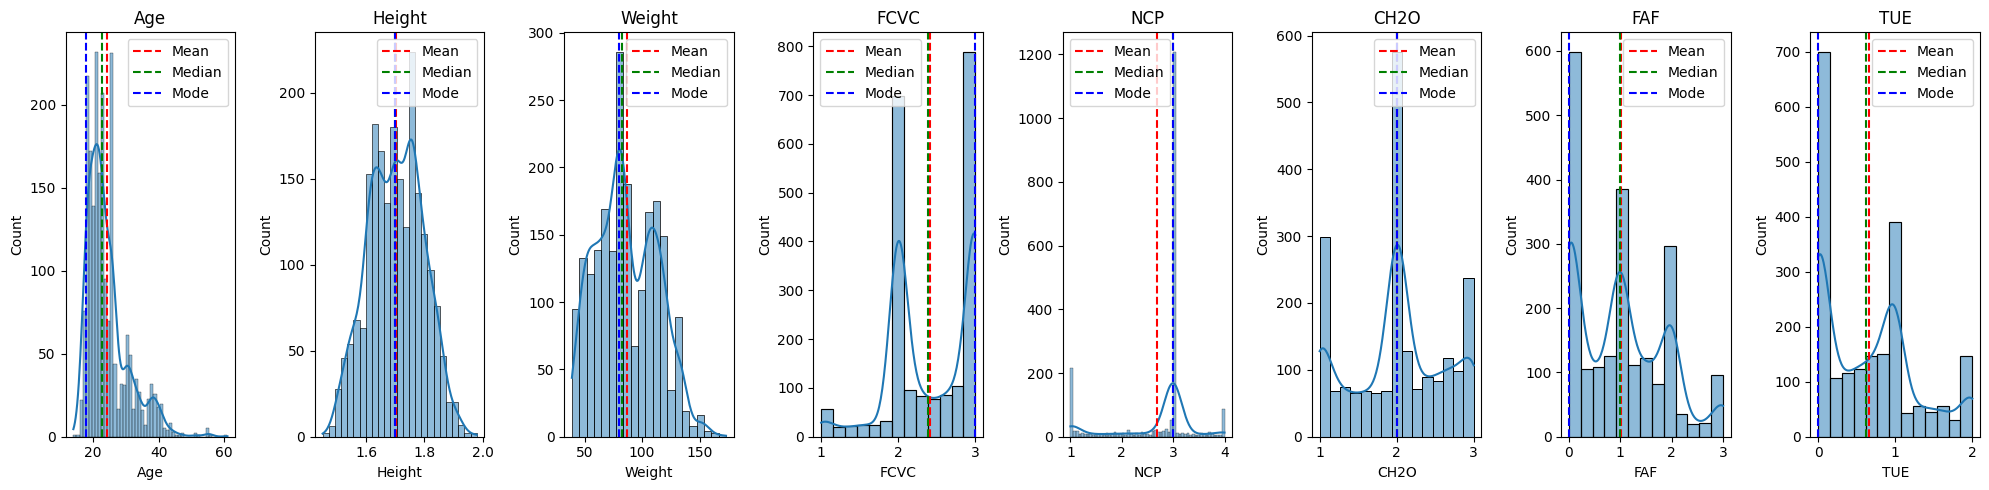

In [115]:
from scipy import stats

fig, axes = plt.subplots(1, len(num_cols), figsize=(20, 5))  # Adjust figsize as needed

for ax, col in zip(axes, num_cols):
    sns.histplot(df_enc[col], ax=ax, kde=True)
    ax.set_title(col)
    ax.axvline(np.mean(df_enc[col]), color='r', linestyle='--', label='Mean')
    ax.axvline(np.median(df_enc[col]), color='g', linestyle='--', label='Median')
    ax.axvline(stats.mode(df_enc[col])[0], color='b', linestyle='--', label='Mode')
    ax.legend()
    
plt.tight_layout()
plt.show()

# Using boxplot to explore the relationships between each continous variable and the target variable

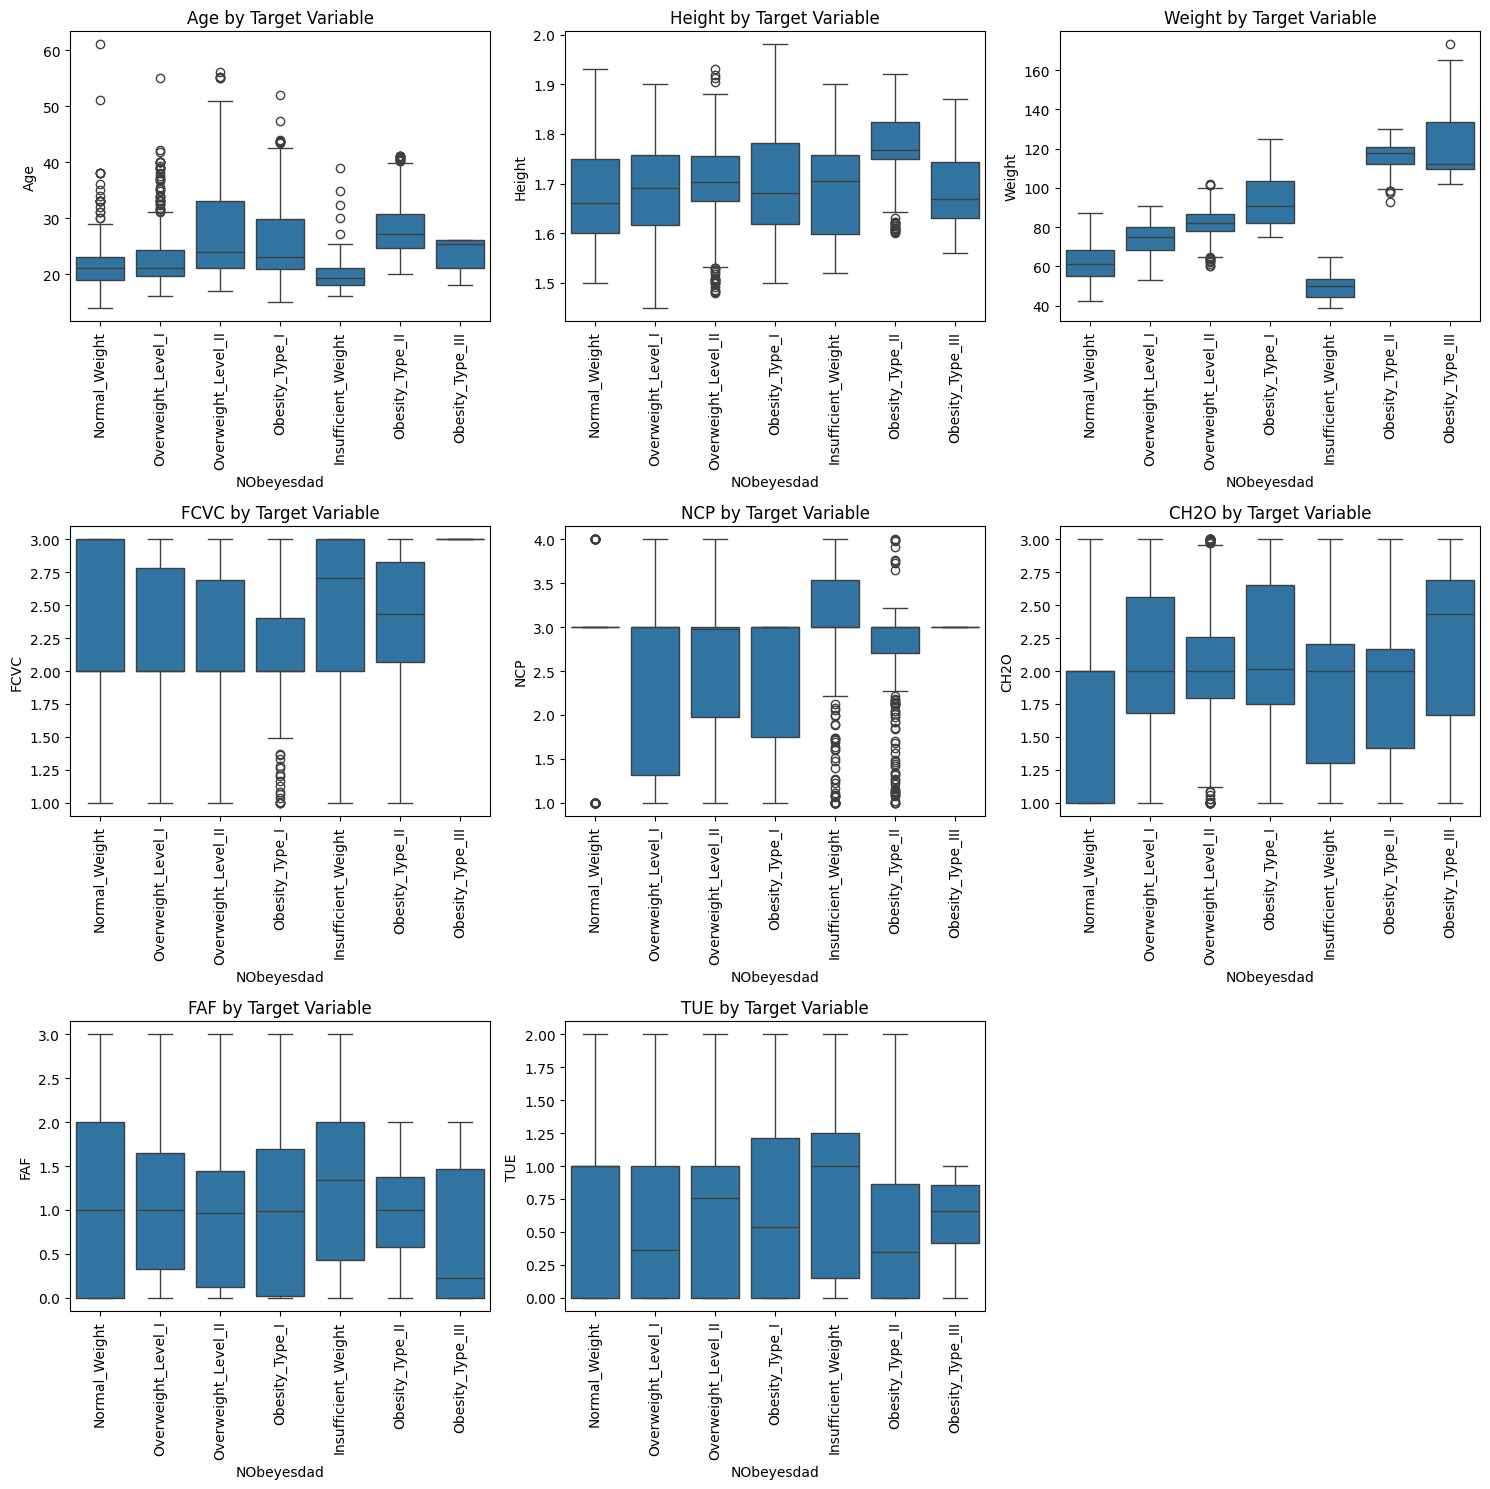

In [58]:
import math

# Define rows and columns based on the number of numerical columns
n_cols = 3  # For example, you want 3 plots per row
n_rows = math.ceil(len(num_cols) / n_cols)  # Calculate the necessary rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=df['NObeyesdad'], y=col, data=df, ax=axes[i])
    axes[i].set_title(f"{col} by Target Variable")
    axes[i].tick_params(axis='x', rotation=90)

# Hide any unused subplots if there are more axes than plots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Analysing the correlation among the continous features

<Axes: >

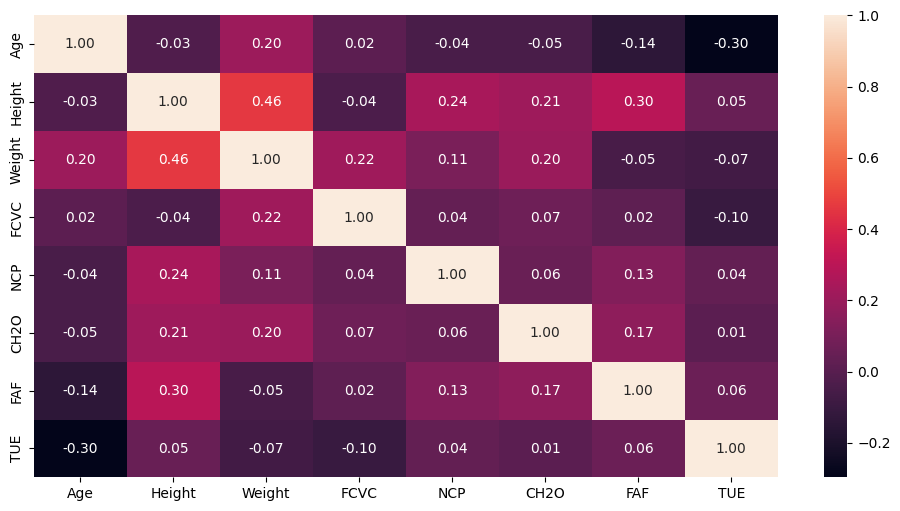

In [62]:
f,ax = plt.subplots(figsize=(12, 6))
sns.heatmap(df_enc[num_cols].corr(), annot = True, fmt= '.2f')

#  Pair plot 

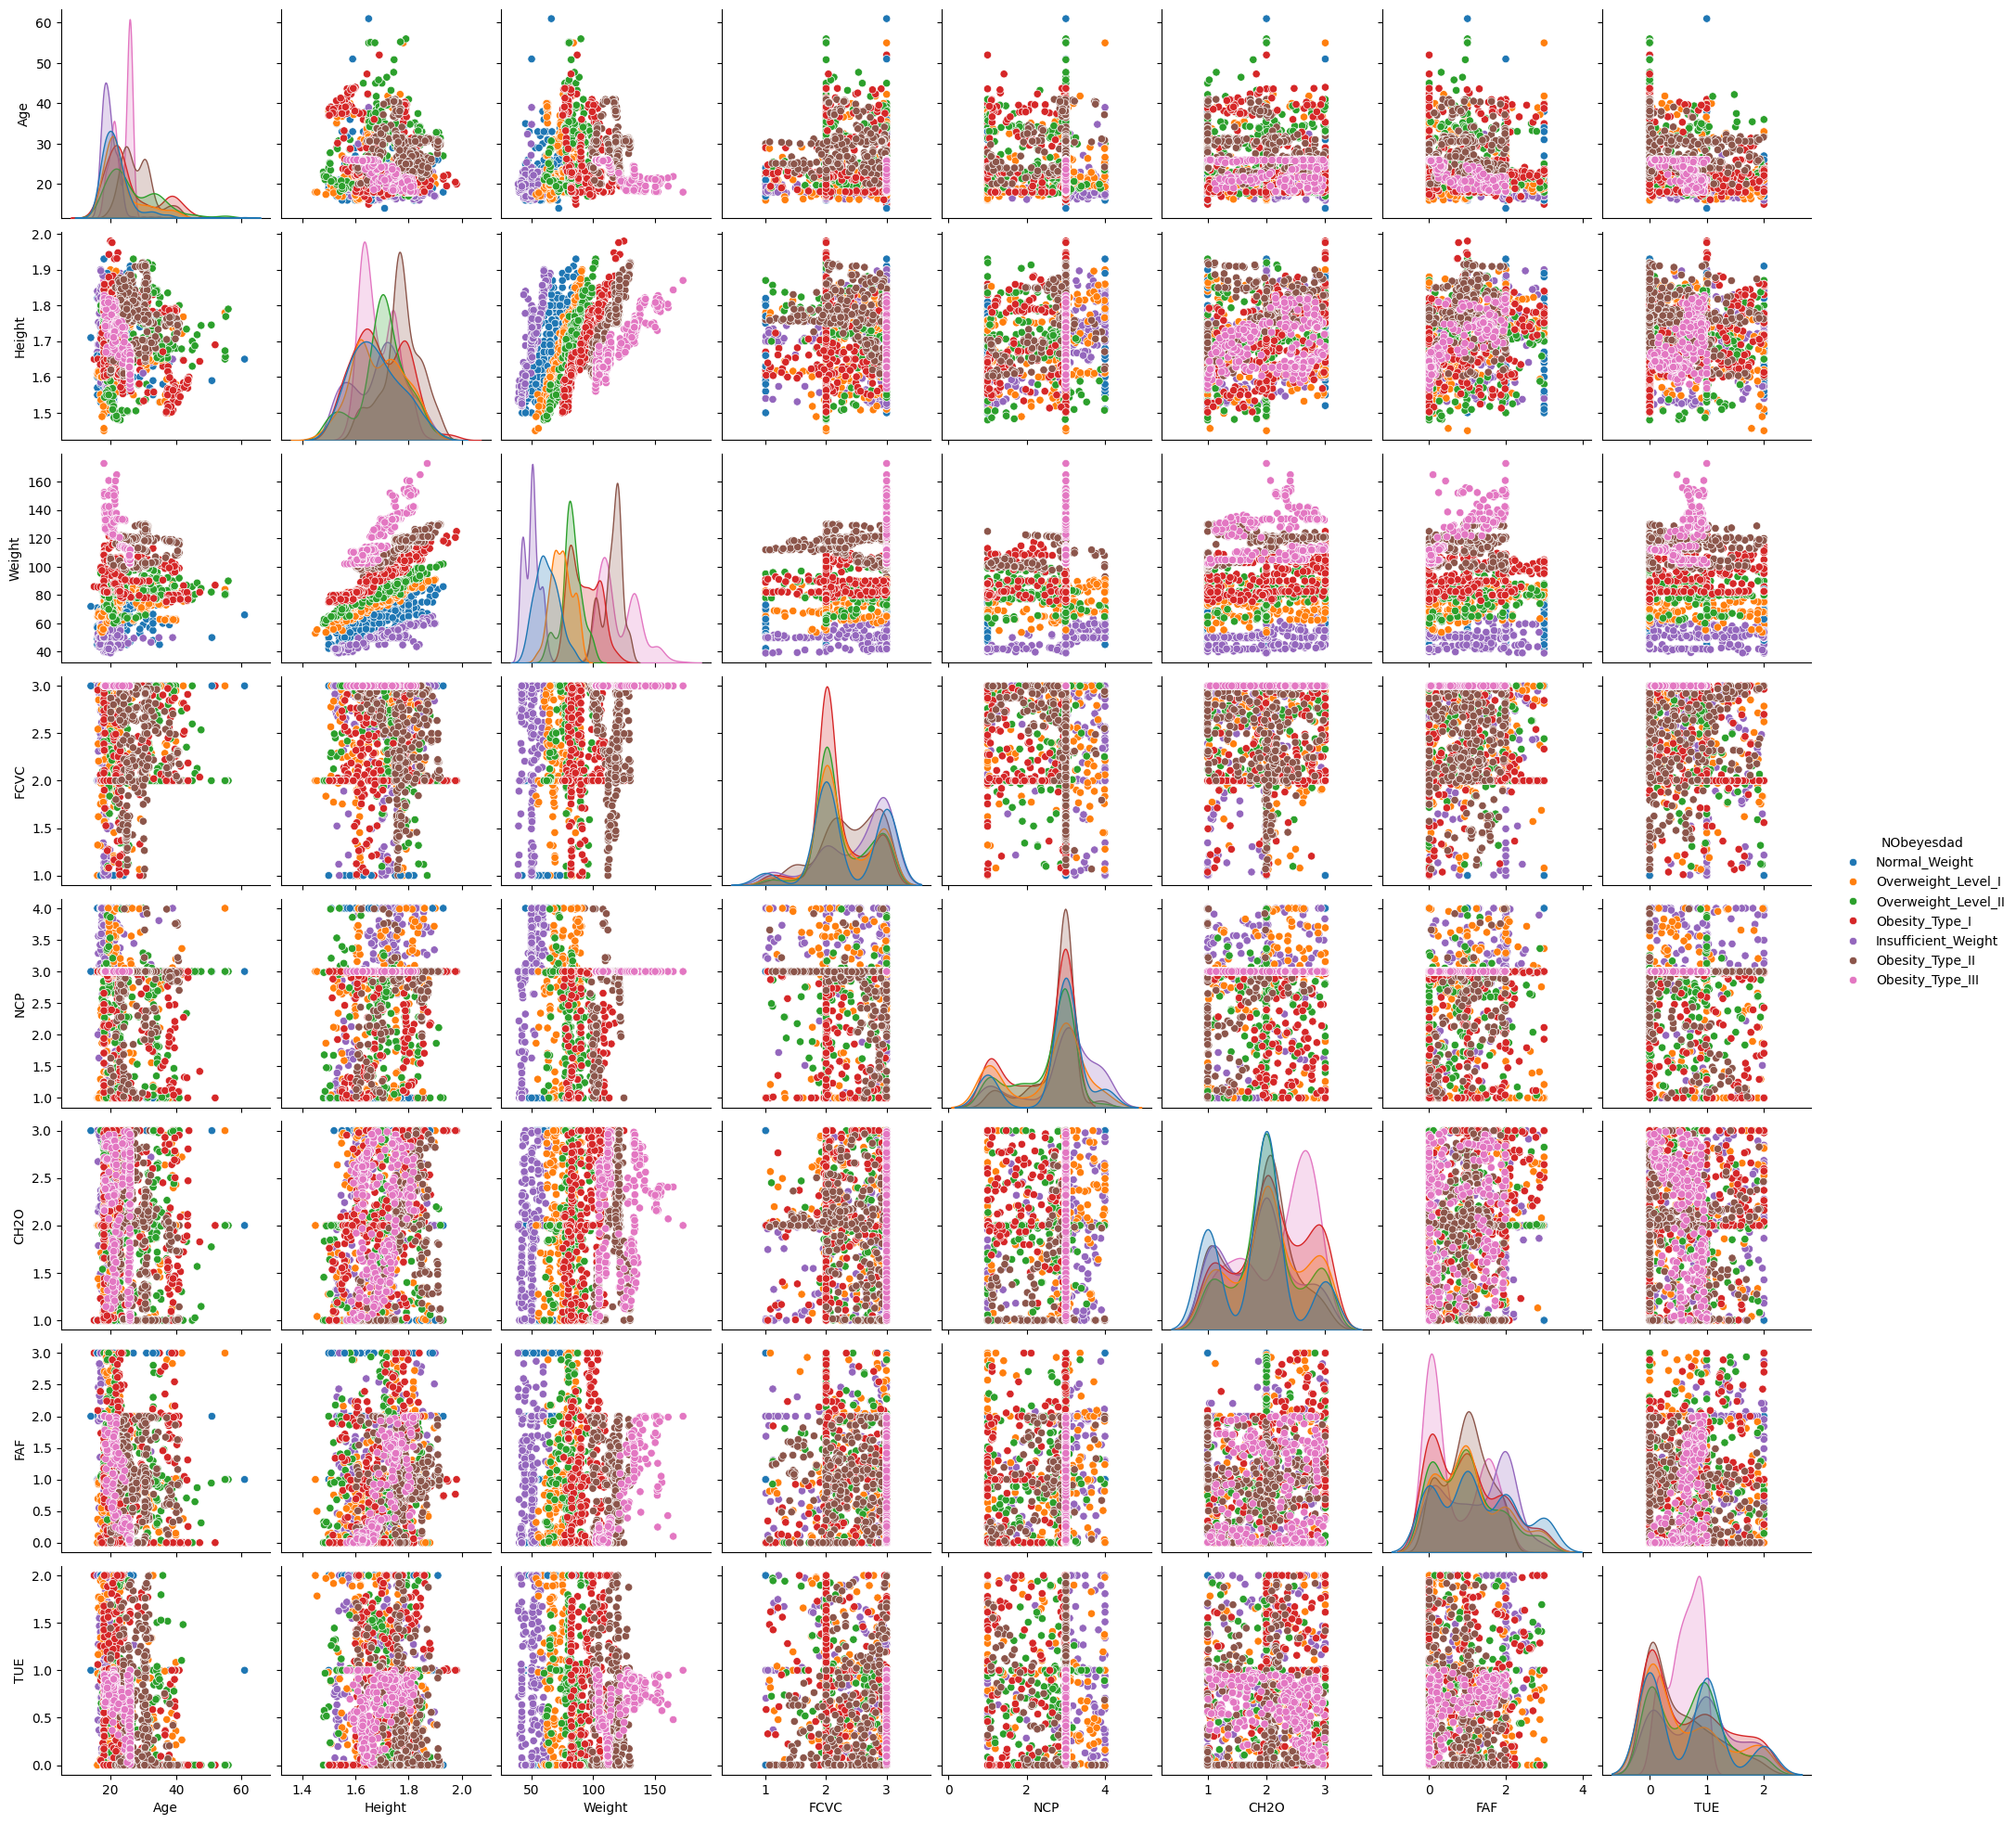

In [89]:
sns.pairplot(df, hue='NObeyesdad')  # Use your target variable for coloring
plt.show()

In [72]:
X = df_enc.drop("NObeyesdad", axis=1)
y = df_enc["NObeyesdad"]

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Logistic Regression model for multi-class classification
# 'multi_class' can be 'ovr' (default) or 'multinomial'
model = LogisticRegression(max_iter=1000, solver='newton-cg')

# Fit the model
model.fit(X_train, y_train)

# Evaluate the model
lg_acc = accuracy_score(y_test, model.predict(X_test))

print(f"Training Accuracy of Logistic regression is {accuracy_score(y_train, model.predict(X_train))}")
print(f"Test Accuracy of Logistic regression is {lg_acc} \n")

#print(confusion_matrix(y_test, model.predict(X_test)))
print(classification_report(y_test, model.predict(X_test)))

Training Accuracy of Logistic regression is 0.8601895734597157
Test Accuracy of Logistic regression is 0.8416075650118203 

              precision    recall  f1-score   support

           0       0.82      0.98      0.89        56
           1       0.82      0.53      0.65        62
           2       0.91      0.90      0.90        78
           3       0.91      1.00      0.95        58
           4       1.00      1.00      1.00        63
           5       0.65      0.75      0.69        56
           6       0.74      0.70      0.72        50

    accuracy                           0.84       423
   macro avg       0.84      0.84      0.83       423
weighted avg       0.84      0.84      0.84       423



# Confusion Matrix for Logistic Regression

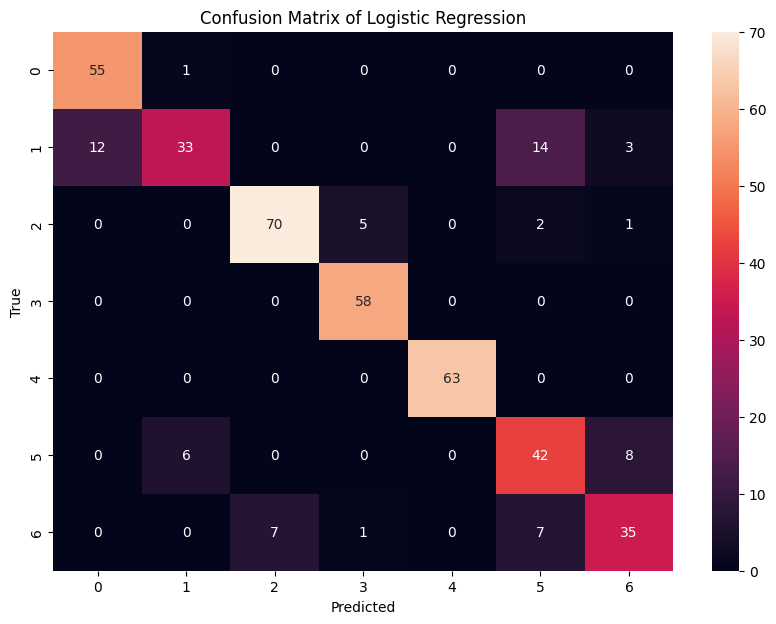

In [95]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, model.predict(X_test))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

# Feature Importance with Logistic Regression

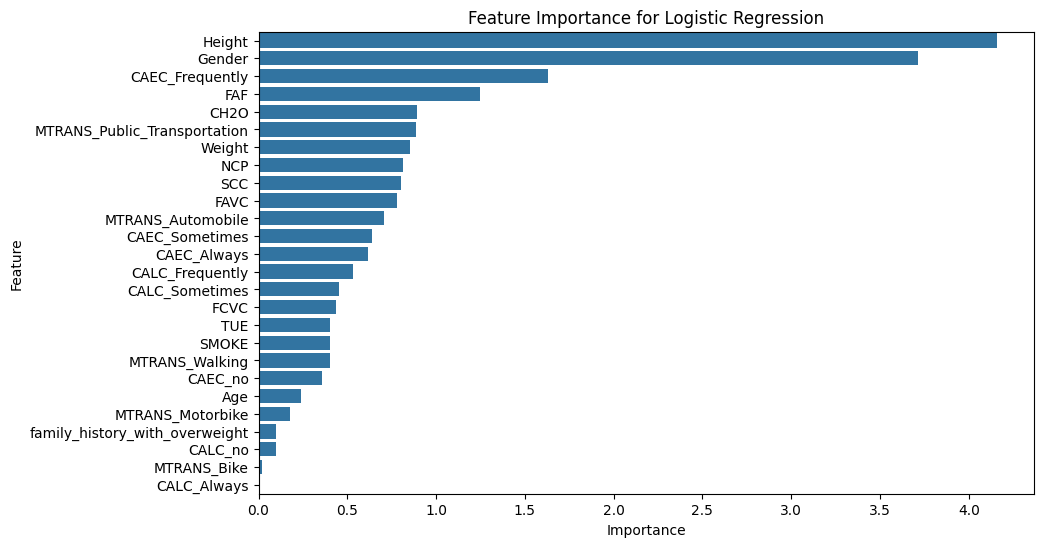

In [103]:
# Get the feature importance (coefficients)
coefficients = model.coef_[0]  # Use coef_[0] if binary classification; otherwise, analyze each class's coefficients

# Map coefficients to feature names
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})
importance_df['Importance'] = np.abs(importance_df['Coefficient'])  # Use absolute value for ranking

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Logistic Regression')
plt.xlabel('Importance')
plt.show()

In [105]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))
#print(rd_clf.predict(X_test_norm))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

#print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.9479905437352246 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97        56
           1       0.85      0.90      0.88        62
           2       0.99      0.95      0.97        78
           3       0.98      0.98      0.98        58
           4       1.00      1.00      1.00        63
           5       0.88      0.88      0.88        56
           6       0.96      0.96      0.96        50

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423



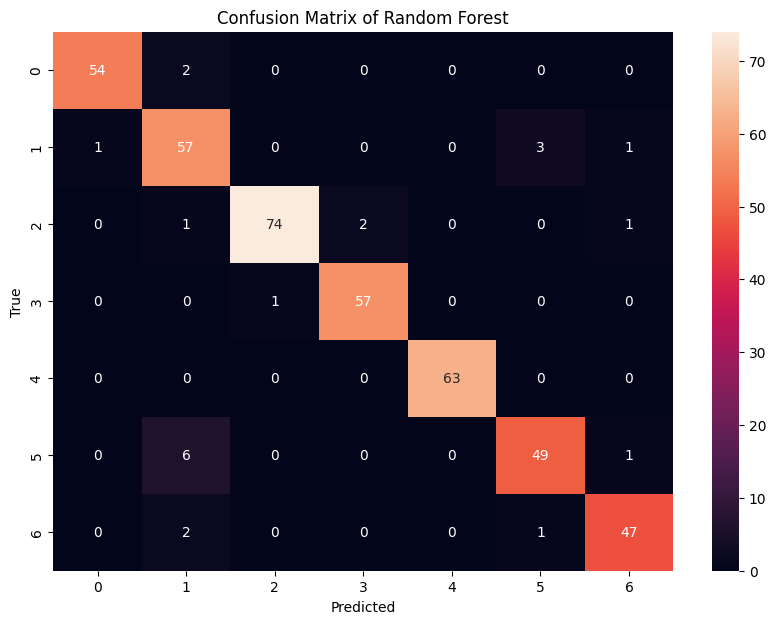

In [98]:
cm = confusion_matrix(y_test, rd_clf.predict(X_test))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Random Forest')
plt.show()

# Feature Importance from Random Forest

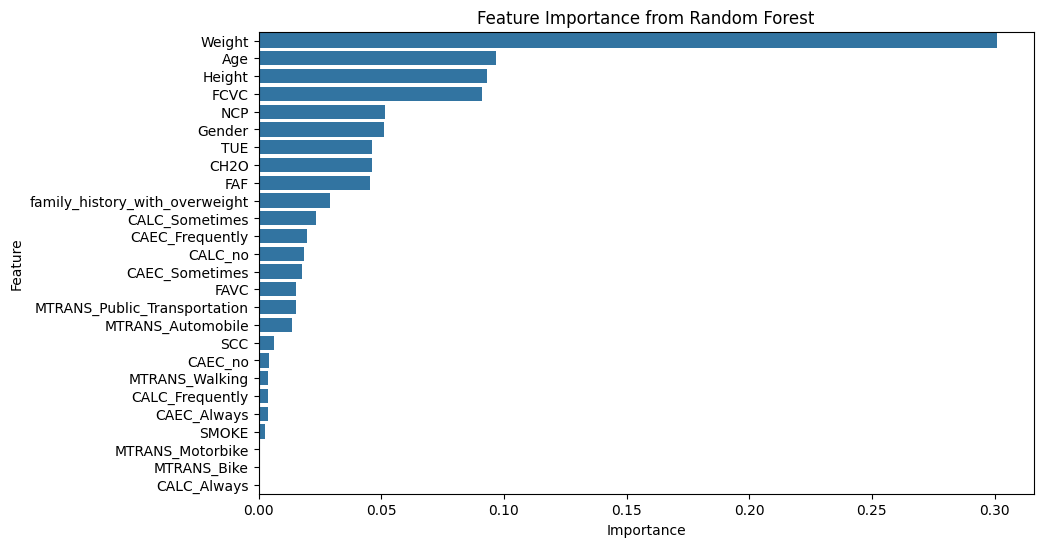

In [100]:
importances = rd_clf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()